# Подготовка к работе

Импортируем необходимые библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import lognorm

# Решаем задачу для стандартного отклонения = 500

Создаем данные для модели

In [2]:
price = 50   #цена 1 пачки печенья
cost = 30    #стоимость производства 1 пачки печенья
discount_price = 15   #цена 1 пачки нераспроданного печенья
box_of_cookies = 12   #количество печенья в 1 упаковке
amount = 2500   #средний спрос на печенье
deviation = 500   #стандартное отклонение спроса в 1 пункте


Очевидно, мы не можем влиять на спрос, а лишь предполагая спрос, находим оптимальное предложение. 
Максимальная прибыль будет при спросе = предложению. С помощью метода Монте-Карло задаем различное предложение и получаем график.


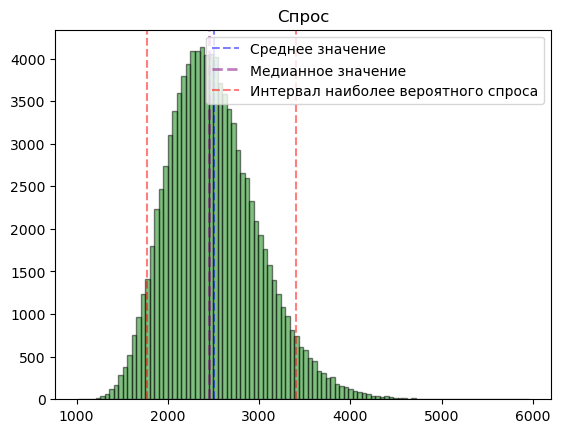

In [3]:
n = 100000
np.random.seed(42)
mu_log = np.log(amount**2 / (amount**2 + deviation**2)**(1/2))   #переводим параметры для логнормального распределения
sigma_log = (np.log(1 + (deviation**2 / amount**2)))**(1/2)   #переводим параметры для логнормального распределения
volume = lognorm.rvs(sigma_log, loc=0, scale=np.exp(mu_log), size=n)
demand = np.array([math.ceil(i) for i in volume])
start = np.quantile(demand, 0.05)
end = np.quantile(demand, 0.95)

# Изобразим на графике распределение предложения и 5% и 95% квантили

fig, ax = plt.subplots()
ax.hist(demand, bins=100, ec="k", color="g", alpha=0.5)
ax.axvline(np.mean(demand), color='b', linestyle='--', alpha=0.5)
ax.axvline(np.median(demand), color='purple', linestyle='--', linewidth=2, alpha=0.5)
ax.axvline(start, color='red', linestyle='--', alpha=0.5)
ax.axvline(end, color='red', linestyle='--', alpha=0.5)
ax.set_title("Спрос")
ax.legend(("Среднее значение", "Медианное значение", "Интервал наиболее вероятного спроса"), loc='upper right')
plt.show()

Для моделирования предложения был выбран интервал между 5% и 95% квантилем - 90% всего возможного спроса будет находится в данном диапазоне, а также среднее и медианное значение лежит в данном интервале. Оценим среднее и медианное значение прибыли.

Оптимальный выпуск: 2453.0


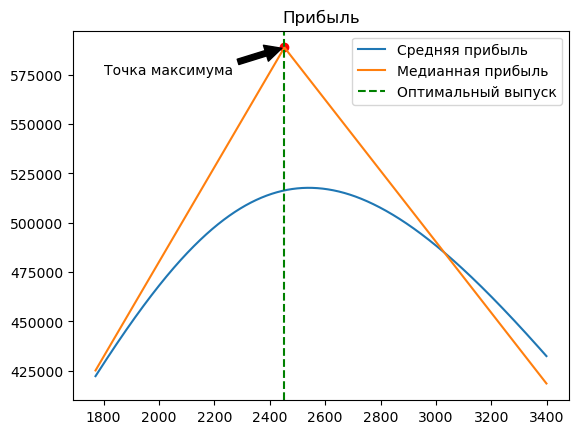

In [4]:
supply = np.arange(start, end)
profit_mean = box_of_cookies*np.array([np.mean(np.where(demand > i, 20*i, 35*demand - 15*i)) for i in supply])
profit_median = box_of_cookies*np.array([np.median(np.where(demand > i, 20*i, 35*demand - 15*i)) for i in supply])
max_profit = np.max(profit_median)
amount_opt = np.where(profit_median == max_profit, supply, np.nan)
amount_opt = amount_opt[~np.isnan(amount_opt)]
print("Оптимальный выпуск:", *amount_opt)

# Изобразим на графике оптимальный выпуск и прибыль

fig, ax1 = plt.subplots()
ax1.plot(supply, profit_mean)
ax1.plot(supply, profit_median)
ax1.axvline(amount_opt, color="g", linestyle="--")
ax1.scatter(amount_opt, max_profit, color="red")
ax1.annotate('Точка максимума', xy=(amount_opt, max_profit), xytext=(1800, 575000),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax1.set_title("Прибыль")
ax1.legend(("Средняя прибыль", "Медианная прибыль", "Оптимальный выпуск"))
plt.show()
#print(np.max(profit_mean), max_profit)

Для анализа оптимального выпуска было выбранно медианное значение прибыли. Так как имеем логнормальное распределение, среднее значение оказывается смещенным и медиана наиболее точно отображает вероятностное распределение спроса. Найдем, при каком производстве будет достигаться максимум прибыли и найдем значение оптимального выпуска.

Теперь найдем, какие средние потери прибыли мы будем получать при заданном производстве.

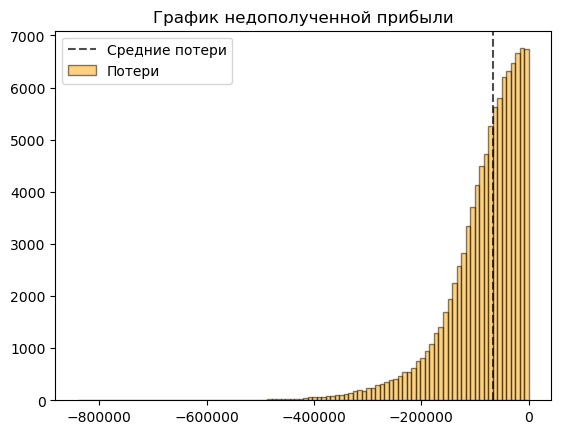

Средние потери: -66240.0


In [5]:
profit_loss = box_of_cookies*np.where(demand > amount_opt, -20*(demand - amount_opt), -15*(amount_opt - demand))

# Изобразим на графике

fig, ax2 = plt.subplots()
ax2.hist(profit_loss, bins=100, color="orange", ec="k", alpha=0.5)
ax2.axvline(np.median(profit_loss), color="black", linestyle="--", alpha=0.7)
ax2.legend(("Средние потери", "Потери"))
ax2.set_title("График недополученной прибыли")
plt.show()
print("Средние потери:", np.median(profit_loss))

**Таким образом, из анализа мы получаем:**
1. **Среднее значение прибыли: 517598.58, Медианное значение прибыли: 588720**
2. **Оптимальный заказ: 2453 упаковок**
3. **Средние потери недополученной прибыли: -66240**

# Решаем задачу для стандартного отклонения = 1000

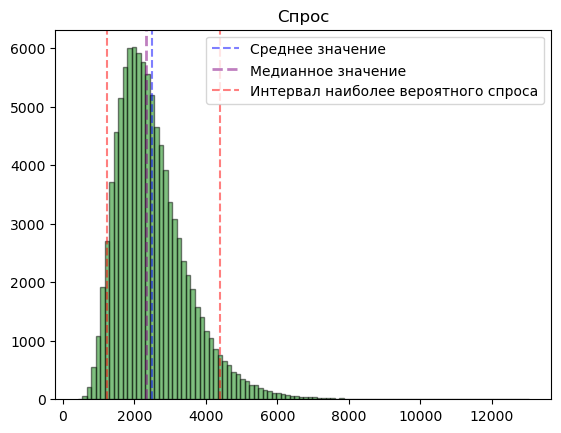

In [6]:
price = 50  
cost = 30   
discount_price = 15   
box_of_cookies = 12  
amount = 2500   
deviation = 1000   #стандартное отклонение спроса в 2 пункте

n = 100000
np.random.seed(42)
mu_log = np.log(amount**2 / (amount**2 + deviation**2)**(1/2))   #переводим параметры для логнормального распределения
sigma_log = (np.log(1 + (deviation**2 / amount**2)))**(1/2)   #переводим параметры для логнормального распределения
volume = lognorm.rvs(sigma_log, loc=0, scale=np.exp(mu_log), size=n)
demand = np.array([math.ceil(i) for i in volume])
start = np.quantile(demand, 0.05)
end = np.quantile(demand, 0.95)

# Изобразим на графике распределение предложения и 5% и 95% квантили

fig, ax = plt.subplots()
ax.hist(demand, bins=100, ec="k", color="g", alpha=0.5)
ax.axvline(np.mean(demand), color='b', linestyle='--', alpha=0.5)
ax.axvline(np.median(demand), color='purple', linestyle='--', linewidth=2, alpha=0.5)
ax.axvline(start, color='red', linestyle='--', alpha=0.5)
ax.axvline(end, color='red', linestyle='--', alpha=0.5)
ax.set_title("Спрос")
ax.legend(("Среднее значение", "Медианное значение", "Интервал наиболее вероятного спроса"), loc='upper right')
plt.show()

Оптимальный выпуск: 2324.0


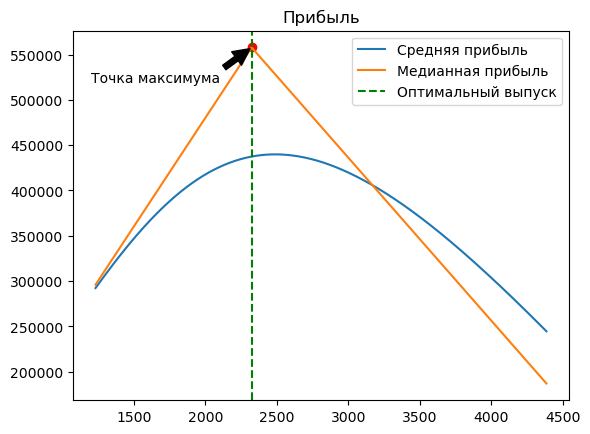

439805.66459999996 557760.0


In [7]:
supply = np.arange(start, end)
profit_mean = box_of_cookies*np.array([np.mean(np.where(demand > i, 20*i, 35*demand - 15*i)) for i in supply])
profit_median = box_of_cookies*np.array([np.median(np.where(demand > i, 20*i, 35*demand - 15*i)) for i in supply])
max_profit = np.max(profit_median)
amount_opt = np.where(profit_median == max_profit, supply, np.nan)
amount_opt = amount_opt[~np.isnan(amount_opt)]
print("Оптимальный выпуск:", *amount_opt)

# Изобразим на графике оптимальный выпуск и прибыль

fig, ax1 = plt.subplots()
ax1.plot(supply, profit_mean)
ax1.plot(supply, profit_median)
ax1.axvline(amount_opt, color="g", linestyle="--")
ax1.scatter(amount_opt, max_profit, color="red")
ax1.annotate('Точка максимума', xy=(amount_opt, max_profit), xytext=(1200, 520000),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax1.set_title("Прибыль")
ax1.legend(("Средняя прибыль", "Медианная прибыль", "Оптимальный выпуск"))
plt.show()
#print(np.max(profit_mean), max_profit)

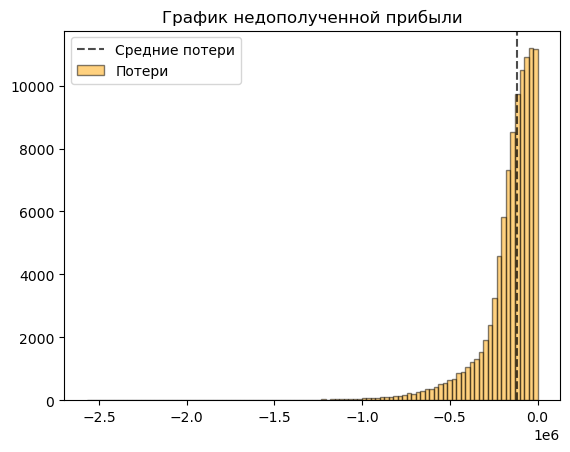

Средние потери: -118980.0


In [8]:
profit_loss = box_of_cookies*np.where(demand > amount_opt, -20*(demand - amount_opt), -15*(amount_opt - demand))

# Изобразим на графике

fig, ax2 = plt.subplots()
ax2.hist(profit_loss, bins=100, color="orange", ec="k", alpha=0.5)
ax2.axvline(np.median(profit_loss), color="black", linestyle="--", alpha=0.7)
ax2.legend(("Средние потери", "Потери"))
ax2.set_title("График недополученной прибыли")
plt.show()
print("Средние потери:", np.median(profit_loss))

**Таким образом, из анализа мы получаем:**
1. **Среднее значение прибыли: 439805.66, Медианное значение прибыли: 557760**
2. **Оптимальный заказ: 2324 упаковок**
3. **Средние потери недополученной прибыли: -118980**